# Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# TensorFlow
import tensorflow as tf
# Autres Imports
import pandas as pd
import numpy as np
import sys

from sklearn.preprocessing import StandardScaler

# Vérification que l'on utilise la bonne version de TensorFlow (version 2)

In [2]:
assert hasattr(tf, "function")

# Utilisation de Fashion MNIST

Fashion MNIST est un dataset déjà préparé qui contient des images de vêtements (chaussures, chemises, talons...). On l'utilise pour entraîner notre modèle à reconnaître les différents types de vêtements (10 possibles).

In [3]:
from sklearn.model_selection import train_test_split # nous permettra de creer automatiquement nos donnees de test

# Import de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data() # recuperation des images et targets du dataset
# On recupere une sous partie du dataset afin de faire les calculs plus rapidement
images = images[:10000]
targets = targets[:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

# Creation des données de test et d'entrainement
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1) # ici, test size = 0.2 donc on utilisera 20% de nos donnees pour en faire des donnees de test

print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


# Plot d'une des données

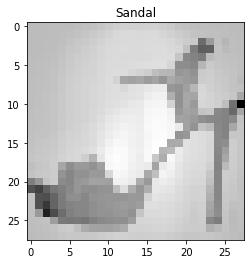

In [4]:
# Création des classes 
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Affichage de la 10eme image
plt.imshow(images[9].reshape(28, 28), cmap="binary") # cmap permet de dire que l'image est en gris donc pas de couleurs
plt.title(targets_names[targets[9]])
plt.show()

In [5]:
print("First line of one image", images[11])
print("Associated Target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Création du modèle

## Transformation de l'image en un unique vecteur (flatten)

In [6]:
# Creation du modele
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28,28])) # ajout d'une operation au modele qui "applatit" l'entree 

print("Shape de l'image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape de l'image apres avoir ete flatten", model_output.shape)

Shape de l'image (1, 784)
1/1 [==============================] - 0s 60ms/step
Shape de l'image apres avoir ete flatten (1, 784)


In [7]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

# Ajout des layers de neurones 
# Modele sequentiel donc l'operation Dense va prendre en entree le resultat de l'operation precedente qui dans notre cas est le
# flatten
model.add(tf.keras.layers.Dense(256, activation="relu")) # ajout d'une premiere couche de 256 neurones
model.add(tf.keras.layers.Dense(256, activation="relu")) # ajout d'une deuxieme couche de 128 neurones ou chaque neurone est connecte a tous les autres du layer precedent
model.add(tf.keras.layers.Dense(10, activation="softmax")) # ajout des 10 neurones de sorties permettant de dire de quelle classe est la donnee, cree une repartition des proba de sorte a ce que la somme des 10 soit egale a 1
# softmax fait en sorte que la somme de la valeur de sorties des 10 neurones soit egale a 1 ce qui transforme ces sorties en probabilite
model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 83ms/step
[[0.09161066 0.02230119 0.10705068 0.0642746  0.20986134 0.05259704
  0.12382625 0.00432477 0.09675548 0.22739793]] [9]


Ici, on voit que notre modèle s'est trompé. En effet, il prédit une probabilité de 1 pour la classe 5 mais la classe attendue était la classe 9. 

In [6]:
# Boite a lancer
# Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 111ms/step
[[0.11320189 0.25230366 0.31311154 0.01435885 0.09184675 0.02996847
  0.01865599 0.1163692  0.02442938 0.02575428]] [9]


# Résumé de notre modèle

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Compilation du modèle

In [8]:
# utilisation d'erreurs afin de minimiser ces dernieres
model.compile(
    loss="sparse_categorical_crossentropy", # le mot cle sparse permet de pouvoir utiliser des valeurs numeriques en tant que label, sans le sparse il faut utiliser le one hot encoding et donc : si il y a 10 classes possibles, 9 -> [0,0,0,0,0,0,0,0,0,1]
    optimizer="sgd", # utilise la methode de la descente de gradient pour reduire les erreurs (stochastique gradient descent)
    metrics=["accuracy"]
)

In [9]:
# Normalisation des données 
images = (images - np.mean(images)) / np.std(images)

# Categorical Cross Entropy

In [11]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

output_test = model.predict(images_test)
print(output_test.shape) # on a (5,10) ce qui signifie que l'on a pour chacune des 5 images 10 probabilités, chacune donnant la proba que l'image appartienne à l'une des 10 classes
print("OUTPUT",output_test)

filtered_output_test = output_test[np.arange(5), labels_test]
print("OUTPUT FILTREE", filtered_output_test) # va renvoyer les probabilités associées à la bonne classe de l'objet récupérée dans les labels (1ere etape de categorical cross entropy)

log_filtered_output = np.log(filtered_output_test) # permet de minimiser l'erreur en utilisant le log de la proba afin de mieux converger vers une solution appropriee (le log a de meilleurs criteres de convergence), 2e etape de categorical cross entropy
print("OUTPUT LOG FILTREE", log_filtered_output)

print("MOYENNE", log_filtered_output.mean()) # on fait la moyenne du vecteur des log et l'objectif est de le maximiser mais comme TF ne peut que minimiser, on va minimiser l'inverse de la moyenne de ce vecteur ce qui reviendra a maximiser les probas, derniere etape de categorical cross entropy
print("MOYENNE A MINIMISER", -log_filtered_output.mean())

(5, 784)
[9 0 0 3 0]
1/1 [==============================] - 0s 67ms/step
(5, 10)
OUTPUT [[0.06600002 0.15618822 0.13084066 0.06095745 0.01315954 0.04516076
  0.17052859 0.12993284 0.07641073 0.15082127]
 [0.00744763 0.20266874 0.09575418 0.05392983 0.10951617 0.02679308
  0.02108031 0.14792852 0.28600585 0.04887563]
 [0.05865385 0.05777673 0.11893512 0.07632586 0.07392311 0.07678814
  0.08701764 0.17473628 0.20281322 0.07303011]
 [0.04222837 0.0755189  0.12911464 0.12525421 0.1020844  0.07244674
  0.0578849  0.10671784 0.22410625 0.06464373]
 [0.03763671 0.10939402 0.11137085 0.07907563 0.28312296 0.05203224
  0.05408996 0.07977279 0.11542717 0.07807764]]
OUTPUT FILTREE [0.15082127 0.00744763 0.05865385 0.12525421 0.03763671]
OUTPUT LOG FILTREE [-1.8916599 -4.89986   -2.8361022 -2.07741   -3.2797754]
MOYENNE -2.9969614
MOYENNE A MINIMISER 2.9969614


Ensuite, en entraînant le modèle (même sur une epoch) et en relançant cette boîte, on remarque que la moyenne est plus basse et que les valeurs des output filtrées sont elles plus hautes ce qui entraîne aussi une diminution des autres probas. C'est ce qu'on veut, à chaque fois notre modèle devient plus performant et reconnaît de mieux en mieux les données.

Remarque : il existe d'autres types de fonctions d'erreur : absolute_difference (pour les modèles de types linéaires), sigmoid_cross_entropy (basé sur le log mais ne prend en compte qu'une valeur en sortie)...

# Entraînement du modèle

On entraîne le modèle uniquement sur les données de train et non les données de tests

In [10]:
history = model.fit(images_train, targets_train, epochs=5, validation_split=0.2, batch_size=1) # entrainement de notre dataset en minimisant l'erreur grace a la cellule precedente. epochs signifie que l'on va repeter l'operation 10 fois, validation split signifie que parmi le jeu d'entrainement, on prend 20% qui serviront de donnees de validation

Epoch 1/5
6400/6400 [==============================] - 10s 1ms/step - loss: 0.6945 - accuracy: 0.7561 - val_loss: 0.7244 - val_accuracy: 0.7462
Epoch 2/5
6400/6400 [==============================] - 9s 1ms/step - loss: 0.4747 - accuracy: 0.8358 - val_loss: 0.5519 - val_accuracy: 0.7962
Epoch 3/5
6400/6400 [==============================] - 8s 1ms/step - loss: 0.3956 - accuracy: 0.8544 - val_loss: 0.5412 - val_accuracy: 0.8200
Epoch 4/5
6400/6400 [==============================] - 8s 1ms/step - loss: 0.3348 - accuracy: 0.8745 - val_loss: 0.5143 - val_accuracy: 0.8231
Epoch 5/5
6400/6400 [==============================] - 8s 1ms/step - loss: 0.3067 - accuracy: 0.8872 - val_loss: 0.6361 - val_accuracy: 0.8194


loss fait echo à "sparse_categorical_crossentropy" et l'accuracy est notre metrique. On remarque que loss baisse au cours des itérations ce qui montre qu'à chaque epoch, notre marge d'erreur est réduite. Cela est prouvé aussi par l'accuracy qui elle augmente.

# Visualisation sur l'evolution du loss et de l'accuracy

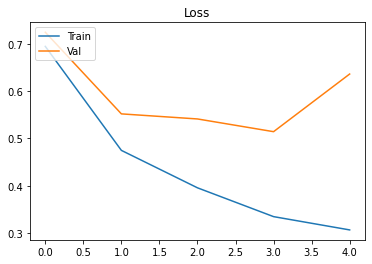

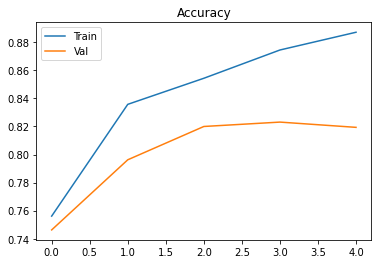

In [11]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label='Train')
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

Nous avons utiliser un Train Set jusqu'ici. Nous voyons sur la courbe loss que plus on entraîne notre modèle plus la marge d'erreur se rapproche de 0. Néanmoins cela ne suffit pas, nous pouvons aussi rajouter un Validation Set (qui doit être différent du Train Set). Cela évite l'overfitting, cas où notre modèle a appris par coeur ses données et prête attention à des détails inutiles qui ne concernent pas les données étudiées (ex : photos d'animaux, le modèle reconnaît les chaises et les canapés et si on lui donne un animal mais cette fois à l'éxtérieur, comme il ne voit pas de chaises ou quoi il ne saura pas reconnaître l'animal comme il faut). L'overfitting se remarque lorsque la marge d'erreur sur le train set diminue tandis que celle sur le validation set se stabilise et ne diminue plus (la courbe peut meme remonter ce qui n'est pas bon). L'overfitting est l'écart des courbes du train set et du validation set. Pour finir, on utilise aussi le Test Set afin de savoir à quel point notre modèle est performant. Attention, le test set ne doit pas être optimisé afin d'avoir de meilleurs résultats.

Il vaut mieux arrêter l'entrainement lorsque la courbe des donnees de validation commence a stagner et faire un plateau meme si l'accuracy sur les donnees d'entrainement continue d'evoluer

# Fonctions d'activation

- Linéaire -> pas d'activation, la valeur d'activation est égale à la valeur de pré activation et on peut avoir en sortie une valeur allant de - l'infini à + l'infini. (ex : pour détecter un oeuf : si val de sortie > 0, oeuf détecté sinon pas oeuf détécté

- Sigmoid -> prend en entrée val de - à + l'infini (val de pré activation) et va réduire ces valeurs entre 0 et 1 (sous forme de probabilité). Proba < 0,5 si val < 0 et > 0.5 si val > 0. Donne la proba que l'image qu'on ait soit celle d'un oeuf.

Néanmoins, si on a plusieurs sigmoid au même layer, il se peut qu'on en ait un qui soit sur a 80% d'avoir un oeuf, l'autre sur a 45 % d'avoir une tomate et l'autre sur a 65% d'avoir une carotte. Ce qui n'est pas bon car c'est un d'eux mais pas tous. Il faut donc que lorsqu'un sigmoid est très sur de lui (99% par ex), les autres soient surs qu'ils se trompent. Pour ça, il nous faut une distribution des probas avec le softmax :

- Softmax -> Prend en entrée toutes les pré activations de tous les neurones de la couche précédente. Avec cela, il renvoie en sortie des probas dont la somme est égale à 1 (chaque proba étant associée a chaque neurone pris en entrée).

Normaliser ses données permet d'avoir un écart plus petit entre les valeurs ce qui permet de faciliter la convergence des modèles et de les rendre plus performant. (ex : au lieu de faire valeur d'angle entre 90 et -90, on fait val entre -1 et 1).

- Tanh : convertit les valeurs données en entrées en valeurs situées entre -1 et 1, ressemble à Sigmoid sur le principe. La différence ici c'est que tanh a une valeur de gradient plus grande ce qui évite le vanish gradient problem (problème ou le gradient devient trop petit et empeche le modele de bien s'entrainer car les poids seront modifies trop lentement et le modele ne convergera pas). Tanh est utile lorsque l'on a besoin d'une valeur précise en sortie. Tanh > Sigmoid si on a le choix entre les deux.

- Relu -> si la valeur de pre activation < 0 alors la valeur de sortie = 0 et si la val > 0 alors la valeur de sortie = valeur de pre activation et ça devient donc linéaire. Lorsque l'activation devient linéaire, le gradient sera linéaire donc il aura moins tendance à tendre vers 0. Ce qui fait que l'on va mieux converger mais attention car si val de pre activ inférieure a 0, les neurones ne seront pas modifiés. Mais relu a le meilleur critere de convergence. Relu s'applique a la sortie de chaque neuron des "hiddden layers", ceux responsable des valeurs de pre activation.

Remarque : pour les layers intermediaires, il est important d'introduire de la non linearite et ensuite de choisir les criteres d'activation qui, dans notre cas, nous donnerons les meilleurs critères de convergence.

# Sauvegarde du modèle

In [12]:
model.save("simple_nn.h5") # va creer un fichier dans le meme dossier que le notebook

# Chargement du modèle (pas besoin de relancer les boîtes sauf import)

In [6]:
loaded_model = tf.keras.models.load_model("simple_nn.h5")
print(loaded_model.predict(images_test[0:1]), targets_test[0:1])

1/1 [==============================] - 0s 44ms/step
[[9.1694101e-09 1.0000000e+00 3.1691414e-09 7.1107897e-10 1.8198897e-11
  3.1598790e-11 1.5034769e-10 3.4372101e-13 1.6776920e-09 2.7850580e-12]] [1]


On observe que notre modèle a bien prédit. On vient de faire de l'inference (= utilisation d'un modele deja entrainé). On pourra réutiliser le modele sur de nouvelles donnees que l'on collectera.